# Pymaceuticals Inc.
---

### Analysis

- 248 mice were analysed (records for one mouse was deleted as part of data cleansing)
- Of the 243 mice 123 were females and 125 males
- 10 types of drugs were administered to the mice in 5 day intervals till 45 days
- During this time the volume of tumour size in mm3 was measured for each mice
- Average age and weight of mice were recorded for the period
- Analyis of 4 types of drugs namely Capomulin, Ramicane, Infubinol and Ceftamin tells the following story
      a) Maximum tumour size was oserved for Infubinol, with data evenly distributed (mean almost equal to median) however data spread was high with std of 6.6
      b) Capomulin and Ramicane showed lowest tumour volume after 45 days at 34.96 and 36.24 respectively
      c) The above 2 drugs had the least std of less than 5
- For Capomulin average tumour size for mouse b128 showed a decreasing trend from 0 to 45 days with an increase manifesting on day 45
- For the population of all mice however, average tumour size has fallen over 45 days for Capomlin
- For mice on Capomulin regime, corelation between tumour size and weight was strong. Heavier the mice, greater the tumour volume
- Of the 10 drugs, Ramicane and Capomulin are the only 2 drug that have led to average tumour size reducing in mice over 45 days

Further scope of testing
- Based on above, further analysis is suggested for these 2 drugs to understand how the sex, age and weight of the mice together contribute to growth of tumour
- Ramicane and Capomulin are recommended to be carried forward for further testing
 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
str_mom_medt = pd.merge(study_results, mouse_metadata, how = "left", on = ["Mouse ID"] )

# Display the data table for preview
str_mom_medt.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [47]:
# Checking the number of mice.
mice_cnt = len(str_mom_medt["Mouse ID"].unique())
mice_cnt

249

In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mic_id=str_mom_medt.loc[str_mom_medt.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
dup_mic_id

array(['g989'], dtype=object)

In [49]:
# Optional: Get all the data for the duplicate mouse ID. 
act_sta = ['g989']
filter = str_mom_medt['Mouse ID'].isin(act_sta)
g989_df = str_mom_medt[filter]
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
str_mom_medt = str_mom_medt.drop(str_mom_medt[str_mom_medt['Mouse ID'] =='g989'].index)
str_mom_medt.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [51]:
# Checking the number of mice in the clean DataFrame.
new_mice_cnt = len(str_mom_medt["Mouse ID"].unique())
new_mice_cnt

248

## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = str_mom_medt.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median =  str_mom_medt.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
sd = str_mom_medt.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
variance = str_mom_medt.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sem = str_mom_medt.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

sumstat = pd.DataFrame({"Mean": mean, "Median": median, "Std": sd, "Variance": variance,"SEM": sem})
sumstat



,Mean,Median,Std,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [103]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
result = str_mom_medt.groupby('Drug Regimen')['Tumor Volume (mm3)']. aggregate(['mean','median','std','var','sem'])
result


,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# First generate count of 'Timepoint' for each 'Drug Regimen'. Call the variable cnt_timep
cnt_timep = str_mom_medt.groupby(['Drug Regimen']).count()['Timepoint']
cnt_timep

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

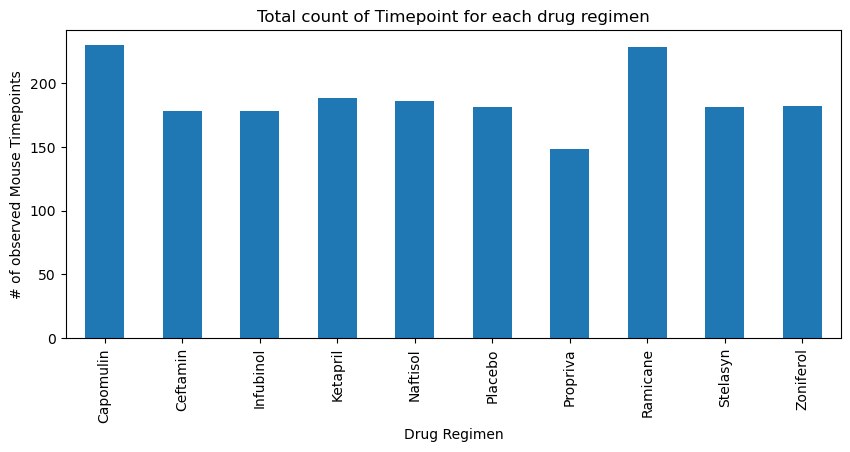

<Figure size 640x480 with 0 Axes>

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
cnt_timep.plot(kind = "bar", figsize = (10,4))

# We will set chart titles and lables for X and Y axis. X axis will be names of each 'Drug Regimen' Y axis the count of 'Timepoints' for each 'Drug Regimen' 

plt.title("Total count of Timepoint for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")

# We will disply the chart and the layout
plt.show()
plt.tight_layout()

In [56]:
# First we count total female and male mice in the sample of 248 mice

count = str_mom_medt[['Mouse ID','Sex']].drop_duplicates()

cnt_f_m= count.groupby(['Sex']).count()['Mouse ID']
cnt_f_m

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

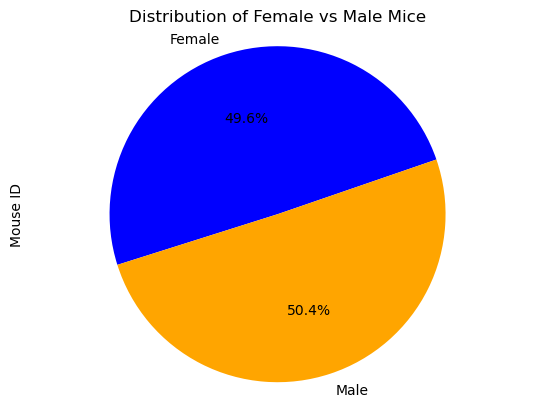

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

cnt_f_m.plot(kind='pie', autopct='%1.1f%%', startangle=19, colors=['blue', 'orange'])
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular

plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# We will first create a new dataset str_mom_medt for the 4 treatment regimes

smm_filter_drug_regime = str_mom_medt[str_mom_medt['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
                                   
# Start by getting the last (greatest) timepoint for each mouse

max_value_smdr = smm_filter_drug_regime.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_mvs = pd.merge(max_value_smdr, smm_filter_drug_regime, how = "left", on = ["Mouse ID","Timepoint"] )

merged_mvs

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [59]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for x in drug_regimen:
    treatment_data = merged_mvs[merged_mvs['Drug Regimen'] == x]
    tumor_volumes = treatment_data['Tumor Volume (mm3)']
    tumor_volume_data[x] = tumor_volumes
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"Potential outliers for {x}: {outliers}")



Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


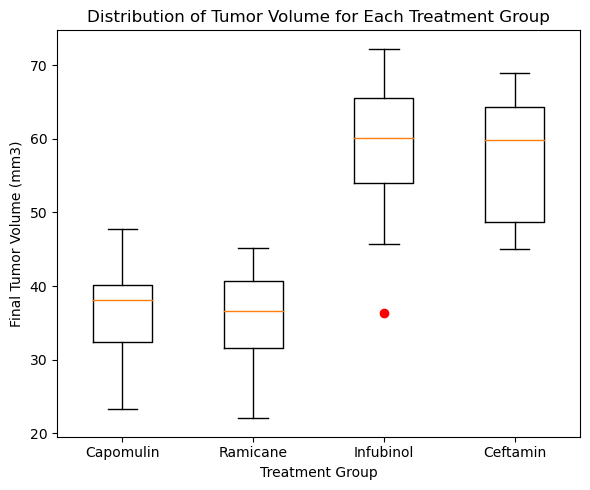

In [60]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = list(tumor_volume_data.values())

treatment_labels = list(tumor_volume_data.keys())

plt.figure(figsize=(6, 5))
plt.boxplot(data_to_plot, labels=treatment_labels, sym='ro')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=0)
plt.tight_layout()

## Line and Scatter Plots

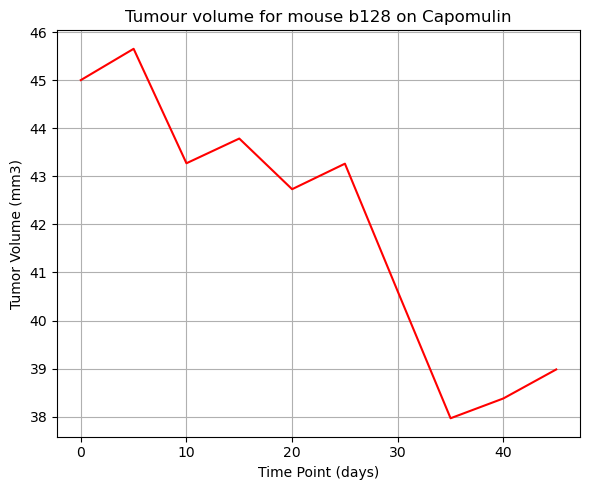

In [79]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

m_select = 'b128'
drug_select = 'Capomulin'

line_data = str_mom_medt[(str_mom_medt['Mouse ID'] == m_select) & (str_mom_medt['Drug Regimen'] == drug_select)]

plt.figure(figsize=(6, 5))
plt.plot(line_data['Timepoint'], line_data['Tumor Volume (mm3)'], color='red')
plt.title(f"Tumour volume for mouse {m_select} on {drug_select}")
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.tight_layout()

plt.show()

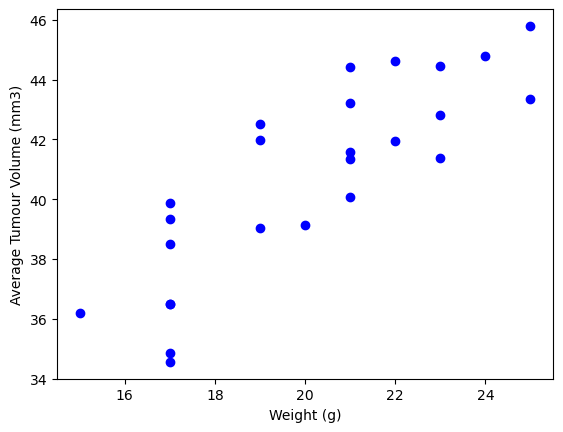

In [99]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

test_df = pd.DataFrame(str_mom_medt.loc[str_mom_medt['Drug Regimen'] == "Capomulin"])

splot_data = test_df.groupby('Mouse ID').aggregate(avg_wt=('Weight (g)','mean'),avg_tum_vol=('Tumor Volume (mm3)','mean'))
# splot_data.head()


plt.scatter(splot_data['avg_wt'],splot_data['avg_tum_vol'],color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.show()

## Correlation and Regression

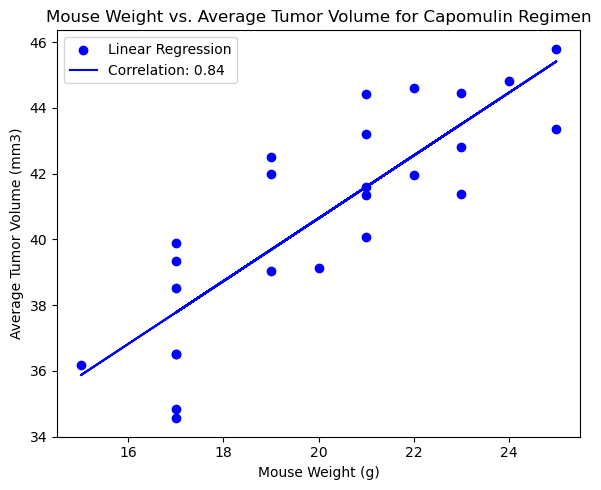

In [102]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = st.pearsonr(splot_data['avg_wt'],splot_data['avg_tum_vol'])[0]

slope, intercept, r_value, p_value, std_err = st.linregress(splot_data['avg_wt'],splot_data['avg_tum_vol'])

plt.figure(figsize=(6, 5))
plt.scatter(splot_data['avg_wt'],splot_data['avg_tum_vol'],color='blue')
plt.plot(splot_data['avg_wt'],slope * splot_data['avg_wt'] + intercept, color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend(['Linear Regression', f'Correlation: {correlation_coefficient:.2f}'])
plt.tight_layout()

plt.show()
